# 1. Using kNN for classification

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data Preprocessing


# a. Renaming columns

In [2]:
with open('seeds_dataset.txt', 'r') as file:
    for i in range(10):  # Read the first 10 lines
        print(file.readline())


# Load the dataset
data = pd.read_csv('seeds_dataset.txt', sep='\t', on_bad_lines='skip',header=None)
data

15.26	14.84	0.871	5.763	3.312	2.221	5.22	1

14.88	14.57	0.8811	5.554	3.333	1.018	4.956	1

14.29	14.09	0.905	5.291	3.337	2.699	4.825	1

13.84	13.94	0.8955	5.324	3.379	2.259	4.805	1

16.14	14.99	0.9034	5.658	3.562	1.355	5.175	1

14.38	14.21	0.8951	5.386	3.312	2.462	4.956	1

14.69	14.49	0.8799	5.563	3.259	3.586	5.219	1

14.11	14.1	0.8911	5.42	3.302	2.7		5		1

16.63	15.46	0.8747	6.053	3.465	2.04	5.877	1

16.44	15.25	0.888	5.884	3.505	1.969	5.533	1



,0,1,2,3,4,5,6,7
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
194,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
195,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
196,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
197,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


# b. Renaming Columns

In [4]:
print(data.columns)
data.rename(columns={0:'area',1:'perimeter',2:'compactness',3:'length_kernel',4:'width ',5:'asymmetry_coeff',6:'length_groove',7:'label'}, inplace=True)

data

Index(['area', 'perimeter', 'compactness', 'length_kernel', 'width ',
       'asymmetry_coeff', 'length_groove', 'label'],
      dtype='object')


,area,perimeter,compactness,length_kernel,width,asymmetry_coeff,length_groove,label
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
194,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
195,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
196,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
197,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


In [6]:
data.head()

,area,perimeter,compactness,length_kernel,width,asymmetry_coeff,length_groove,label
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [7]:
data.describe()

,area,perimeter,compactness,length_kernel,width,asymmetry_coeff,length_groove,label
count,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000
mean,14.918744,14.595829,0.870811,5.643151,3.265533,3.699217,5.420653,1.994975
std,2.919976,1.310445,0.023320,0.443593,0.378322,1.471102,0.492718,0.813382
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.330000,13.470000,0.857100,5.267000,2.954500,2.570000,5.046000,1.000000
50%,14.430000,14.370000,0.873400,5.541000,3.245000,3.631000,5.228000,2.000000
75%,17.455000,15.805000,0.886800,6.002000,3.564500,4.799000,5.879000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.315000,6.550000,3.000000


# Creating and Training the KNN Model

In [18]:
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier


X, y= data.drop(columns=['label']),data['label']
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=42)



model= KNeighborsClassifier(n_neighbors=7).fit(X_train,y_train)

pred_labels=model.predict(X_test)

# Plotting K and Accuracy

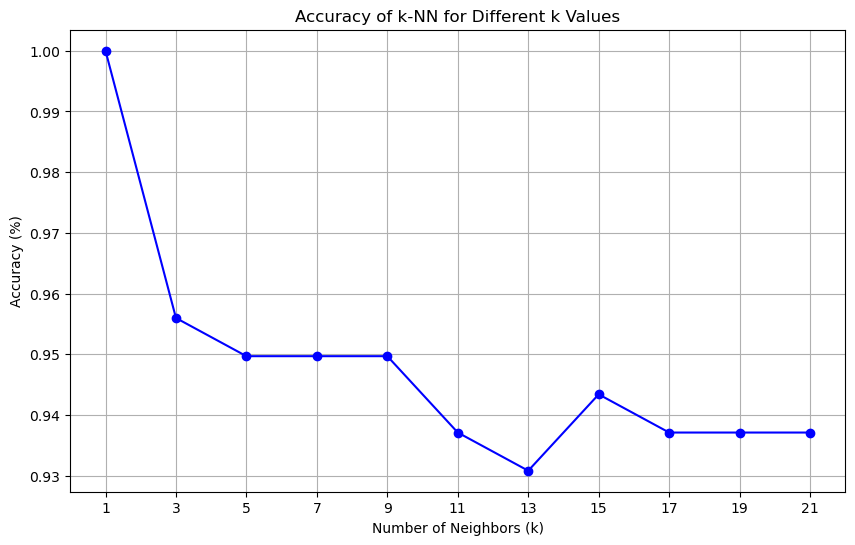

In [29]:
k_values = list(range(1, 22, 2))
accuracies = []

# Seeing the effect of varying K on  the accuracy of the model 
for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
    acc = model.score(X_train, y_train)
    accuracies.append(acc)

plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='b')
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy (%)")
plt.title("Accuracy of k-NN for Different k Values")
plt.xticks(k_values)
plt.grid(True)
plt.show()

# 2. KMeans Clustering

# Setting up model, Clustering and calculating key metrics (distiortion and silhouette scores)

In [44]:

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist

X=data.drop(columns=['label'])
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

K= range(2,12)
silhouette_scores=[]
distortions=[]

for k in K:
    kmeans= KMeans(n_clusters=k, random_state=42).fit(X_scaled)
    cluster_labels=kmeans.predict(X_scaled)
    distortions.append(sum(np.min(cdist(X_scaled, kmeans.cluster_centers_,'euclidean'),axis=1))/X_scaled.shape[0])
    silhouette_scores.append(metrics.silhouette_score(X_scaled, cluster_labels,metric='euclidean'))


D:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


# Elbow Method

Text(0.5, 1.0, 'Elbow Method: Distortion = f(k)')

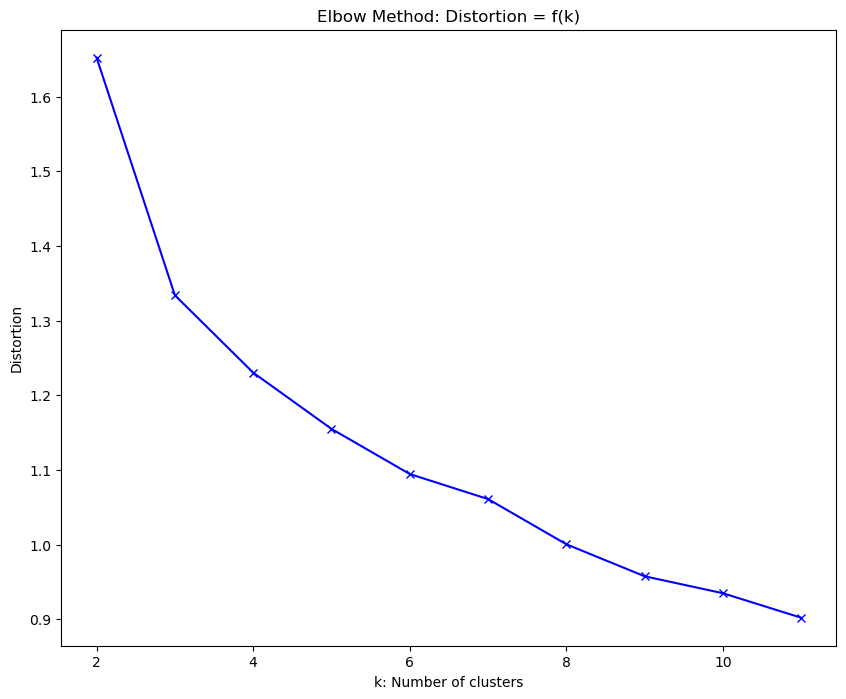

In [54]:
plt.figure(figsize=(10, 8))
plt.plot(K,distortions, 'bx-')
plt.xlabel('k: Number of clusters')
plt.ylabel('Distortion')
plt.title('Elbow Method: Distortion = f(k)')


# Silhouette Method

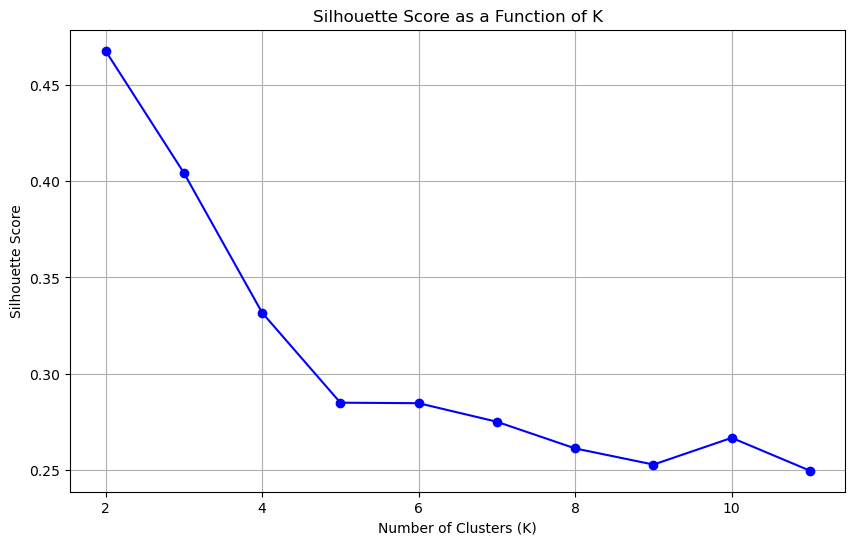

In [55]:
plt.figure(figsize=(10, 6))
plt.plot(K, silhouette_scores, marker='o', linestyle='-', color='b')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score as a Function of K")
plt.grid(True)
plt.show()